# Rainfall Prediction using Machine Learning
**Introduction**

Predicting rainfall accurately is a crucial task for various industries, including agriculture, disaster management, and urban planning. Traditional meteorological methods often fail to provide precise predictions. This project leverages machine learning techniques to classify whether rainfall will occur based on atmospheric parameters.

# Importing Libraries and Dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

# DataSet Link
https://media.geeksforgeeks.org/wp-content/uploads/20240510131249/Rainfall.csv

In [49]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


# Dataset Overview

In [50]:
df.shape

(366, 12)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


# Data Cleaning & Preprocessing

Handling Missing Values

In [53]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [54]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

Feature Cleaning

In [55]:
df.rename(str.strip,
          axis='columns',
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [56]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

np.int64(0)

# Exploratory Data Analysis

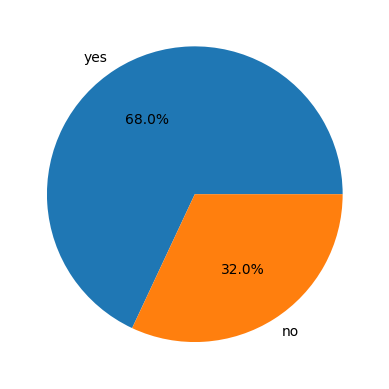

In [57]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [58]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [59]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


**Distribution Analysis**

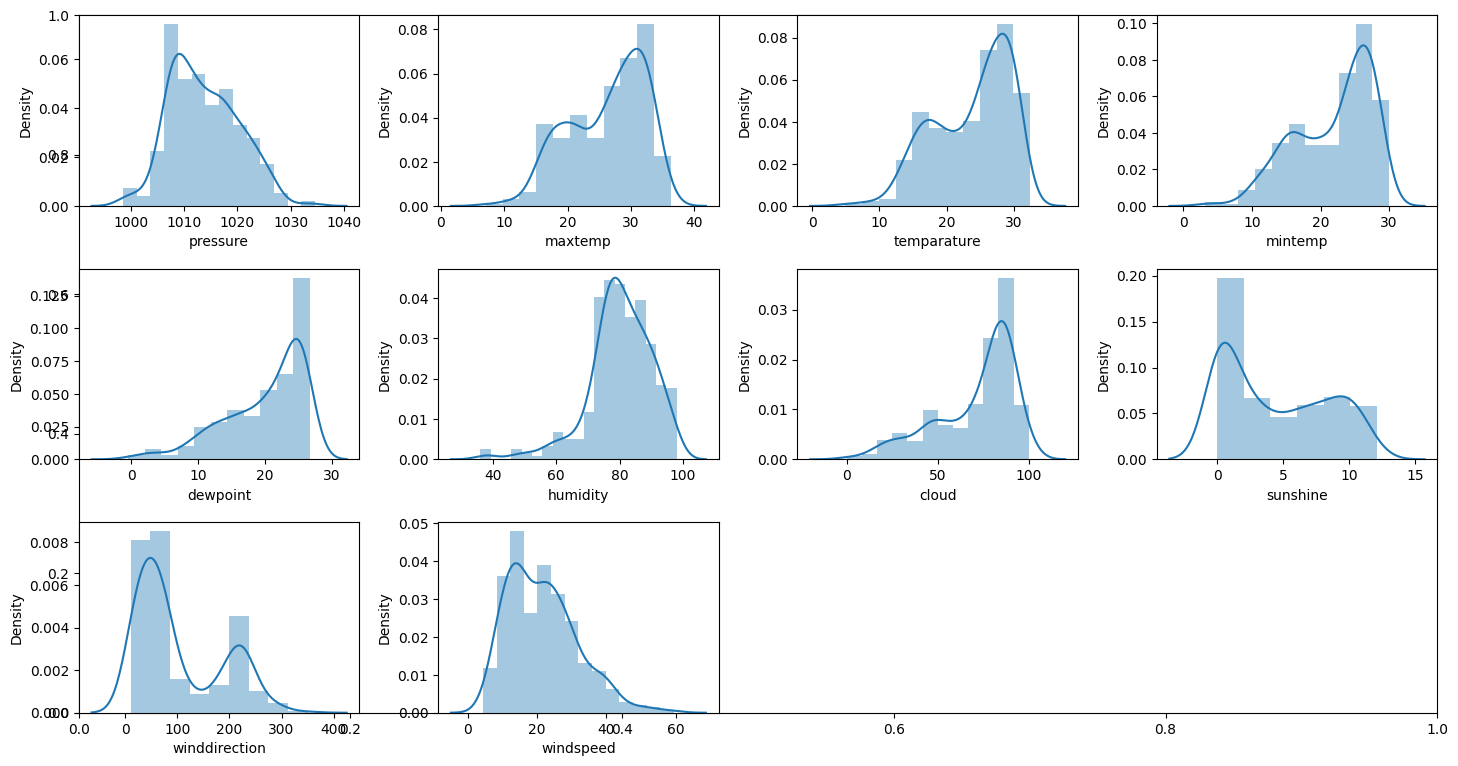

In [60]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

**Outlier Detection**

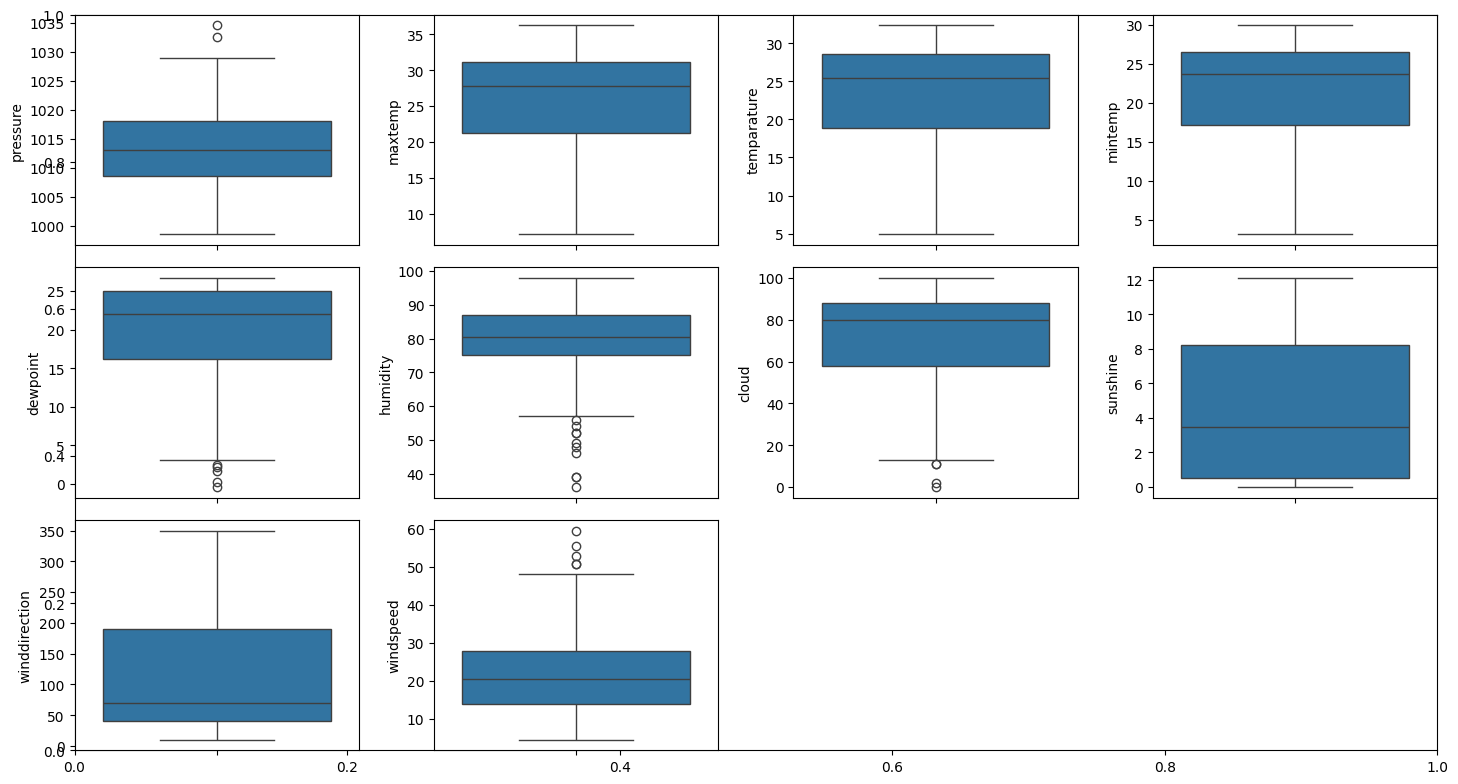

In [61]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [62]:
df.replace({'yes':1, 'no':0}, inplace=True)

**Feature Correlation**

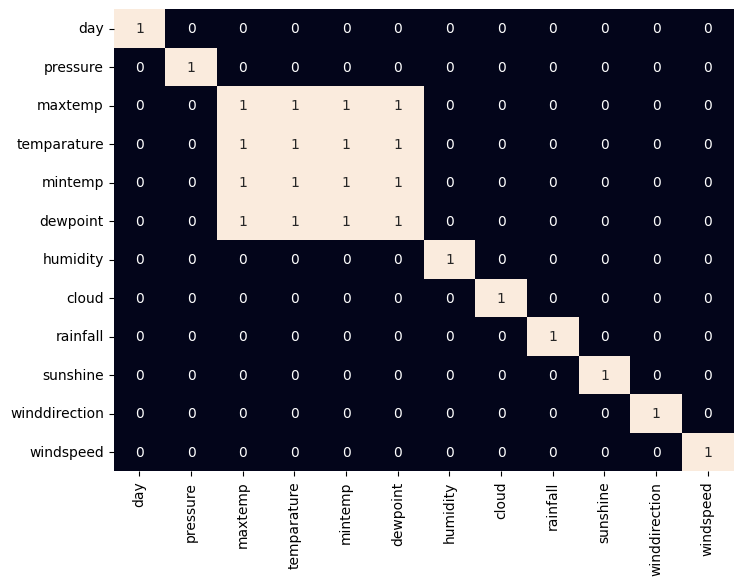

In [63]:
plt.figure(figsize=(8,6))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [64]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)


In [65]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

# Model Training

In [66]:
X_train, X_temp, Y_train, Y_temp = train_test_split(features,
                                                    target,
                                                    test_size=0.4, # Split 40% for temp set (val + test)
                                                    stratify=target,
                                                    random_state=2)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp,
                                                Y_temp,
                                                test_size=0.5, # Split temp set 50/50 for val and test
                                                stratify=Y_temp,
                                                random_state=2)

In [67]:
# Re-run balancing on the new train set
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

# Re-run scaling with the new sets
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Defining Models & Training Models

In [68]:
# Define models
models = [LogisticRegression(), SVC(kernel='rbf', probability=True)]

# Train models
for model in models:
    model.fit(X, Y)
    print(f'{model} : ')

    # Training Predictions
    train_preds = model.predict_proba(X)
    print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:, 1]))

    # Validation Predictions
    val_preds = model.predict_proba(X_val)
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:, 1]))
    print()



LogisticRegression() : 
Training Accuracy :  0.8784739426151975
Validation Accuracy :  0.7782608695652173

SVC(probability=True) : 
Training Accuracy :  0.9215801090040989
Validation Accuracy :  0.7182608695652174



# Model Evaluation

**Confusion Matrix**

LogisticRegression() Train Confusion Matrix:


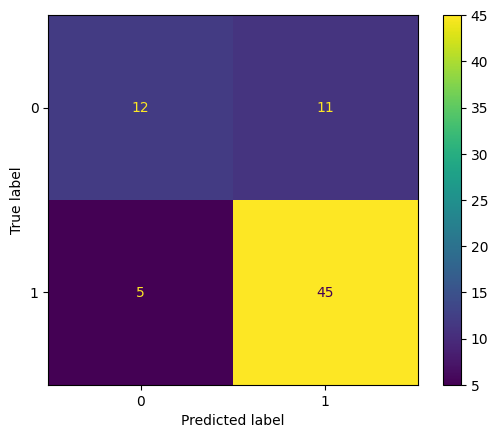

SVC(probability=True) Train Confusion Matrix:


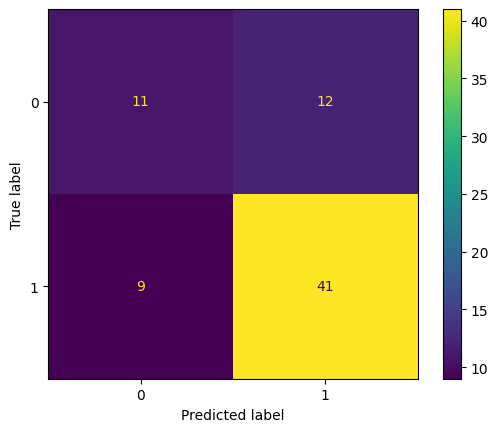

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for model in models:
    print(f'{model} Train Confusion Matrix:') # Modified print statement for clarity
    ConfusionMatrixDisplay.from_estimator(model, X_val, Y_val) # Use the current model in the loop
    plt.show()


**Classification Report**


Logistic Regression Model Test Results:
Test ROC AUC Score: 0.9575
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.92      0.94      0.93        50

    accuracy                           0.91        74
   macro avg       0.90      0.89      0.89        74
weighted avg       0.90      0.91      0.90        74

Test Confusion Matrix:


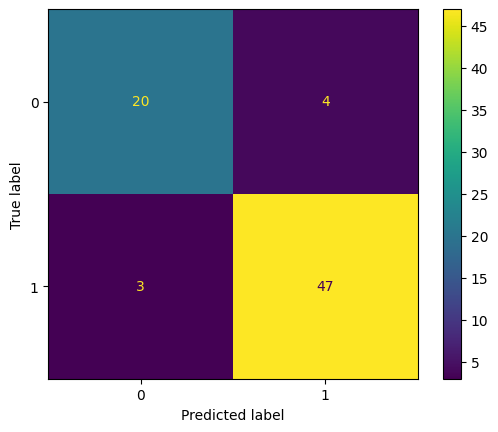

In [75]:
# Evaluate the Logistic Regression model on the test set
lr_model = models[0] # Access the trained Logistic Regression model

print('\nLogistic Regression Model Test Results:')

test_preds_proba_lr = lr_model.predict_proba(X_test)
print('Test ROC AUC Score:', metrics.roc_auc_score(Y_test, test_preds_proba_lr[:, 1]))

test_preds_lr = lr_model.predict(X_test)
print('Test Classification Report:')
print(metrics.classification_report(Y_test, test_preds_lr))

print('Test Confusion Matrix:')
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, Y_test)
plt.show()

SVC Model Test Results:
Test ROC AUC Score: 0.94
Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.85      0.90      0.87        50

    accuracy                           0.82        74
   macro avg       0.81      0.78      0.79        74
weighted avg       0.82      0.82      0.82        74

Test Confusion Matrix:


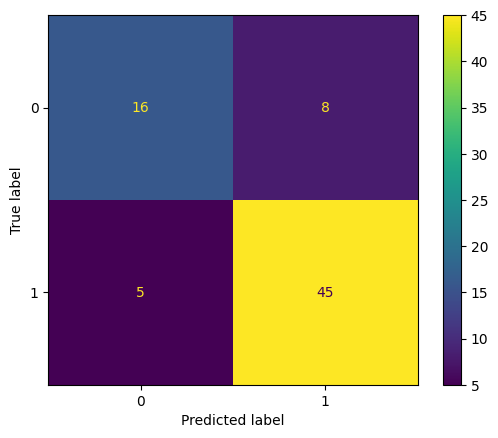

In [76]:
# Evaluate the SVC model on the test set
svc_model = models[1] # Access the trained SVC model

print('SVC Model Test Results:')

test_preds_proba = svc_model.predict_proba(X_test)
print('Test ROC AUC Score:', metrics.roc_auc_score(Y_test, test_preds_proba[:, 1]))

test_preds = svc_model.predict(X_test)
print('Test Classification Report:')
print(metrics.classification_report(Y_test, test_preds))

print('Test Confusion Matrix:')
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, Y_test)
plt.show()

# Conclusion

In this project, we successfully built and evaluated machine learning models for rainfall prediction. We began by cleaning and preprocessing the dataset, handling missing values and addressing multicollinearity by removing highly correlated features ('maxtemp' and 'mintemp'). Exploratory Data Analysis provided valuable insights into the data's distribution and the class imbalance in the target variable ('rainfall').

We trained two classification models, Logistic Regression and Support Vector Classifier (SVC), after employing Random Over-sampling to mitigate class imbalance and scaling the features.

Upon evaluating the models on the validation and test sets, we observed the following:

The Logistic Regression model achieved a test ROC AUC score of  95.75%. and a test accuracy of 91%.
The SVC model achieved a test ROC AUC score of 94% and a test accuracy of 82%.

Based on these test set evaluation metrics, the **Logistic Regression** model demonstrates superior performance for this rainfall prediction task, with a higher ROC AUC score and overall accuracy compared to the SVC model. Furthermore, the classification report for Logistic Regression reveals a better balance in precision and recall for predicting rainfall, which is a crucial aspect for this problem.

This project demonstrates the application of machine learning techniques for a real-world prediction problem and highlights the importance of data preprocessing, addressing class imbalance, and comprehensive model evaluation in building effective predictive systems. The results indicate that a simpler model like Logistic Regression can be highly effective when appropriate data handling techniques are applied.